In [210]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

# Reading f and g data for 3 resolutions

In [211]:
res=[1,2,3]

dataf=[]
datag=[]

for resolution in res:
    dir = "/home/rita13santos/Desktop/MSc Thesis/DATA/res{}".format(resolution)

    print(dir)
    
    count=0
    for path in os.listdir(dir):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir, path)):
            count += 1
    print('File count in dir', dir, 'is: ', count)


    f=[]
    g=[]
    #iterate over files in dir
    for i in range(count):
        with pd.option_context('display.precision', 20):
            df = pd.read_csv(dir + "/time_step{}.csv".format(i), header=None, dtype = str)
        #print(df)
        #print("{0:.19f}".format(df[0][0]))
        df = df.to_numpy()
        df = np.transpose(df)
        #print(type(df[0]))
        aux = [float(x) for x in df[0]]
        f.append(aux)
        aux = [float(x) for x in df[1]]
        g.append(aux)

    # f[i] is the array of the values of f on the whole grid on time step i
    
    print('len(f) = ', len(f))

    print('len(f[0]) = ', len(f[0]))
    
    dataf.append(f)
    datag.append(g)

/home/rita13santos/Desktop/MSc Thesis/DATA/res1
File count in dir /home/rita13santos/Desktop/MSc Thesis/DATA/res1 is:  201
len(f) =  201
len(f[0]) =  205
/home/rita13santos/Desktop/MSc Thesis/DATA/res2
File count in dir /home/rita13santos/Desktop/MSc Thesis/DATA/res2 is:  401
len(f) =  401
len(f[0]) =  405
/home/rita13santos/Desktop/MSc Thesis/DATA/res3
File count in dir /home/rita13santos/Desktop/MSc Thesis/DATA/res3 is:  801
len(f) =  801
len(f[0]) =  805


In [212]:
#print(dataf[0][0]) #this is the array of the value of f all over the grid on timestep 0 with resolution 1

#print(dataf[0][1]) #this is the array of the value of f all over the grid on timestep 1 with resolution 1

#print(dataf[1][0]) #this is the array of the value of f all over the grid on timestep 0 with resolution 2
print(len(dataf))

3


In [213]:
print(len(dataf[0][0])) #this gives the number of gridpoints with resolution 1

print(len(dataf[1][0])) #this gives the number of gridpoints with resolution 2

print(len(dataf[0])) #this give the number of timesteps

205
405
201


In [214]:
print(dataf[0][0][1]) # dataf indexes give res, time then gridpoint

0.021491117899319706


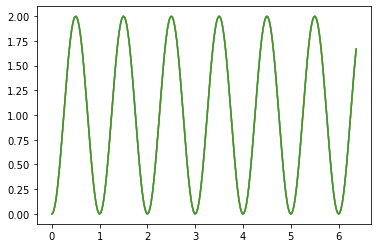

In [215]:
import math

dx1 = 0.2 # this is the dx when the grid has resolution 1
dx2= 0.1
dx3= 0.05

plt_x1 = np.linspace(0, 200, 201) * dx1
plt_x2 = np.linspace(0, 200*2, 200*2+1) * dx2
plt_x3 = np.linspace(0, 200*4, 200*4+1) * dx3

plt.plot(plt_x1/(2*math.pi),dataf[0][0][2:len(dataf[0][0])-2])
plt.plot(plt_x2/(2*math.pi),dataf[1][0][2:len(dataf[1][0])-2])
plt.plot(plt_x3/(2*math.pi),dataf[2][0][2:len(dataf[2][0])-2])

# Plotting f with resolutions 1 and 2 and differences 

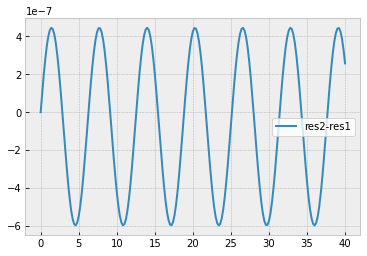

201
401
205
205


In [216]:
# for t=0
t1=100
t2=2*t1
t3=4*t1
aux = []
for i in range(len(dataf[1][t2])):#iterate on the grid with higher resolution
    if ((i>1) and (i < (len(dataf[1][t2])-2)) and ((i%2)==0)): #ignoring ghost points
        aux.append(dataf[1][t2][i])
        #print(dataf[1][0][i])

        
dx = 0.2 # this is the dx when the grid has resolution 1

#plt_x = np.linspace(0, 200, 201) * dx
#plt_xx = np.linspace(0, 201+4,200+4) * dx

#subtracting f in both resolutions & ignoring ghost points
diff_f_2_1 = np.subtract(dataf[0][t1][2:len(dataf[0][t1])-2],aux)

#print(diff_f_2_1[1])
#print(dataf[0][0][3]-aux[1])

#plt.plot(plt_x, dataf[0][0][2:len(dataf[0][0])-2], label = 'f')
with plt.style.context('bmh'):
    plt.plot(plt_x1, diff_f_2_1, label = 'res2-res1')
    #plt.plot(plt_x, dataf[0][0][2:len(dataf[0][0])-2], label = 'f')

plt.legend()
plt.show()

print(len(dataf[0]))
print(len(dataf[1]))
print(len(dataf[0][0]))
print(len(dataf[0][1]))

In [217]:
print(len(plt_x))
print(len(dataf[0][0]))

201
205


Resolution 4

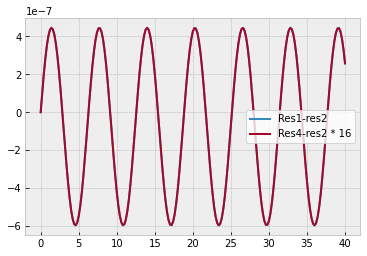

In [218]:
# for t=0

aux2 = []
for i in range(len(dataf[2][t3])):#iterate on the grid with higher resolution
    if ((i>1) and (i < (len(dataf[2][t3])-2)) and (((i-2)%4)==0)): #ignoring ghost points
        aux2.append(dataf[2][t3][i])
        


#subtracting f in both resolutions & ignoring ghost points
diff_f_4_2 = np.subtract(aux,aux2)

with plt.style.context('bmh'):
    plt.plot(plt_x1, diff_f_2_1, label='Res1-res2')
    plt.plot(plt_x1, diff_f_4_2*16, label='Res4-res2 * 16')


#plt.plot(plt_x,dataf[0][0][2:len(dataf[0][0])-2],label='f')


plt.legend()
plt.show()



# Plotting g with resolutions 1 and 2 and differences

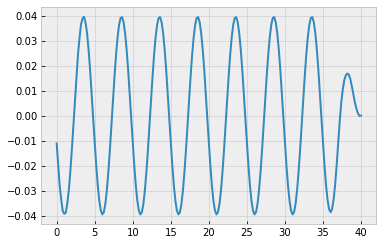

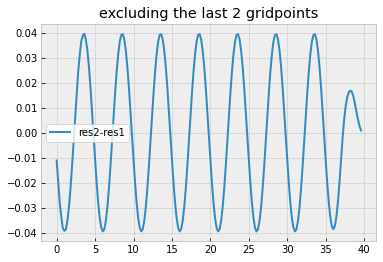

(39.8, 40.2)

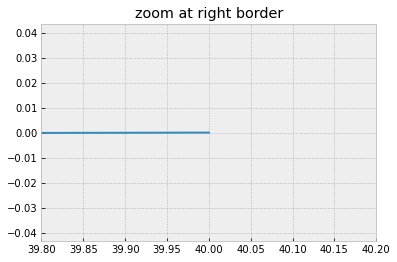

In [219]:
# for t=0
t1=100
t2=2*t1
t3=4*t1
aux = []
for i in range(len(datag[1][t2])):#iterate on the grid with higher resolution
    if ((i>1) and (i < (len(datag[1][t2])-2)) and ((i%2)==0)): #ignoring ghost points
        aux.append(datag[1][t2][i])

#subtracting g in both resolutions & ignoring ghost points
diff_g_2_1 = np.subtract(datag[0][t1][2:len(datag[0][t1])-2],aux)

with plt.style.context('bmh'):
    #plt.title('differences between res 2 and 1 on the common gridpoints')
    plt.plot(plt_x1, diff_g_2_1, label='res2-res1')

plt.show()

with plt.style.context('bmh'):
    plt.title('excluding the last 2 gridpoints')
    plt.plot(plt_x1[0:len(plt_x1)-2], diff_g_2_1[0:len(plt_x1)-2], label='res2-res1')


plt.legend()
plt.show()


with plt.style.context('bmh'):
    plt.title('zoom at right border')
    plt.plot(plt_x1, diff_g_2_1, label='res2-res1')

plt.xlim([39.8,40.2])

Resolution 4

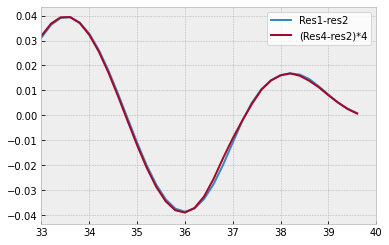

In [220]:
# for t=0

aux2 = []
for i in range(len(datag[2][t3])):#iterate on the grid with higher resolution
    if ((i>1) and (i < (len(datag[2][t3])-2)) and (((i-2)%4)==0)): #ignoring ghost points
        aux2.append(datag[2][t3][i])


diff_g_4_2 = np.subtract(aux,aux2)

#plt.plot(plt_x, abs(diff_g_2_1), label='Res1-res2')
#plt.plot(plt_x, abs(diff_g_4_2)*4-2*0.00125, label='Res4-res2')

with plt.style.context('bmh'):
    plt.plot(plt_x1[0:len(plt_x1)-2], diff_g_2_1[0:len(plt_x1)-2], label='Res1-res2')
    plt.plot(plt_x1[0:len(plt_x1)-2], diff_g_4_2[0:len(plt_x1)-2]*4, label='(Res4-res2)*4')


plt.xlim([33,40])
plt.legend()
plt.show()

Note: not plotting last 2 gridpoints for clarity reasons: the differences was too close to 0 for the plot to look good

# Plotting f with resolutions 1 and 2 and differences && now over time

In [103]:
diff_f_2_1 = []

for t in range(len(dataf[0])): #iterate on time
    aux = []
    for i in range(len(dataf[1][2*t])):#iterate on the grid with higher resolution
        if ((i>1) and (i < (len(dataf[1][2*t])-2)) and ((i%2)==0)): #ignoring ghost points
            aux.append(dataf[1][2*t][i])



    #subtracting f in both resolutions & ignoring ghost points
    diff_f_2_1.append(np.subtract(dataf[0][2*t][2:len(dataf[0][2*t])-2],aux))



plt.plot(plt_x1, diff_f_2_1[0], label = 'res2-res1')

plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (1601,) (201,) 

note: diff_f_2_1 increases in time

TO DO:
    
    run the same thing but with other constraint functions
    
    (check) print the aux vectors to make sure the diffs plotted are right (especially and the right border of g)
    
    precision
    
    (check) make this convergence test evolve on time
    
    make the other convergence test

Plotting Grids


COMPARE EXACTLY THE SAME R :)!! needs to be 4* ou 16*
plot the same but for the higher resolution

automatize :)

In [ ]:
##########ATENÇÃOOOOO Estes linspaces têm erros





print(plt_x)

print(plt_xx)

"""cst = np.zeros(len(plt_x))
plt.scatter(plt_x,cst, 0.0001)
plt.ylim(-0.01, 0.01)"""

Experimenting other way of reading data

In [ ]:
"""df = pd.read_fwf("/home/rita13santos/Desktop/MSc Thesis/DATA/res1/time_step1.csv", header=None)

#print(df.iloc[:, 0])

cols = []

col1 = df.iloc[:, 0]
col1 = col1.to_numpy()
cols.append(col1)
    
"""f = col.filter((a, i) => i % 2 === 0)
print(f)"""

print(cols[0::2])"""